In [ ]:
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("emp_data_2000_2014.csv")

In [ ]:
data

,emp,age,syear,state,west,mig,edu,nchil,marst,male
0,1,39,2000,[11] Berlin 11,[1] West-Germany 1,German,18.0,0,[2] Single 2,[1] Male 1
1,1,40,2001,[11] Berlin 11,[1] West-Germany 1,German,18.0,0,[2] Single 2,[1] Male 1
2,1,42,2002,[11] Berlin 11,[1] West-Germany 1,German,18.0,0,[2] Single 2,[1] Male 1
3,1,43,2003,[11] Berlin 11,[1] West-Germany 1,German,18.0,0,[2] Single 2,[1] Male 1
4,0,44,2004,[11] Berlin 11,[1] West-Germany 1,German,18.0,0,[2] Single 2,[1] Male 1
...,...,...,...,...,...,...,...,...,...,...
213587,1,22,2014,[3] Lower Saxony 3,[1] West-Germany 1,German,11.5,0,[2] Single 2,0
213588,1,25,2014,[10] Saarland 10,[1] West-Germany 1,German,11.5,0,[2] Single 2,0
213589,1,20,2014,[16] Thuringia 16,0,German,13.0,0,[2] Single 2,0
213590,1,26,2014,[6] Hessen 6,[1] West-Germany 1,German,18.0,0,[2] Single 2,[1] Male 1


# 1. Run a logistic regression using emp as dependent variable, and west, edu, nchil, marst, male as explanatory variables.Interpret the results

In [ ]:
model = sm.logit(formula='emp ~ west + edu + nchil + marst + male', data=data).fit()

Optimization terminated successfully.
         Current function value: 0.257411
         Iterations 8


In [ ]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                    emp   No. Observations:               213592
Model:                          Logit   Df Residuals:                   213583
Method:                           MLE   Df Model:                            8
Date:                Fri, 11 Oct 2024   Pseudo R-squ.:                  0.1092
Time:                        11:37:20   Log-Likelihood:                -54981.
converged:                       True   LL-Null:                       -61722.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -2.2490      0.057    -39.286      0.000      -2.361      -2.137
west[T.[1] West-Germany   1]      1.0610      0.017     61.367      0.000 

**LLR p-value: 0.000:** This value suggests that the model as a whole is statistically significant

**Intercept = -2.2490:**
 This value is negative, which means that the baseline probability of being employed is low when all other variables are at their baseline level

**West-Germany = 1.0610:**
A positive coefficient means that individuals from West Germany have higher log-odds of being employed compared to those from East Germany. This effect is highly significant with a p-value of 0.000.

**marst_single = -0.6898:**
This coefficient represents the log-odds of being employed for Single individuals compared to the Married individuals. The negative value indicates that being Single is associated with a lower probability of being employed compared to being Married.

**marst_Widowed = -0.4577:**
Being Widowed is associated with a lower probability of employment compared to being Married

**marst_Divorced = -0.8078:**
Divorced individuals are less likely to be employed than Married individuals

**marst_Separated = -0.7808:**
Separated individuals also have a lower probability of employment

**male = 0.0992:**
Males are more likely to be employed than Females

**edu = -0.3619:**
Each additional year of education increases the log-odds of being employed

**nchil = -0.1038:**
Each additional child is associated with a decrease in the log-odds of employment

In [ ]:
import numpy as np
odds_ratios = pd.Series(model.params).apply(lambda x: np.exp(x))
print("Odds Ratios:\n", odds_ratios)

Odds Ratios:
 Intercept                        0.105501
west[T.[1] West-Germany   1]     2.889296
marst[T.[2] Single         2]    0.501681
marst[T.[3] Widowed        3]    0.632767
marst[T.[4] Divorced       4]    0.445826
marst[T.[5] Separated      5]    0.458041
male[T.[1] Male           1]     1.104246
edu                              1.436078
nchil                            0.901387
dtype: float64


**West-Germany ≈ 2.89:**
This means that the odds of being employed in West Germany are almost 2.89 times higher compared to East Germany.

**marst_single ≈ 0.502:**
This suggests that the odds of being employed for Single individuals are about 50.2% of the odds for Married individuals.

**marst_widowed ≈ 0.633:**
Widowed individuals have 63.3% of the odds of being employed compared to Married individuals, meaning Widowed individuals are less likely to be employed than Married individuals.

**marst_Divorced = 0.446:**
Divorced individuals have about 44.6% of the odds of being employed compared to Married individuals, indicating a significantly lower likelihood of being employed

**marst_Separated = 0.458:**
Separated individuals have 45.8% of the odds of being employed compared to Married individuals, showing a lower likelihood of employment.

**male = 1.104:**
Males have 1.10 times higher odds of being employed compared to females. This means that being male increases the odds of being employed by about 10.4% compared to being female.

**edu = 1.436:**
Each additional year of education increases the odds of being employed by approximately 43.6%. This highlights the strong positive impact of education on employment.

**nchil = 0.901:**
Each additional child reduces the odds of being employed by approximately 9.9%. This suggests that having more children is associated with a slightly lower probability of employment.

Region (West Germany) and Education have a positive impact on
employment, with higher odds of being employed.

Marital Status shows that married individuals have higher employment odds compared to singles, widowed, divorced, or separated individuals.

Gender has a small but positive effect, with males being slightly more likely to be employed.

Number of Children negatively affects employment odds, though the effect is not very large.

# 2. Get marginal effects of the independent variables (mentioned in point 1) and interpret the results.

In [ ]:
marginal_effects = model.get_margeff()
print(marginal_effects.summary())

        Logit Marginal Effects       
Dep. Variable:                    emp
Method:                          dydx
At:                           overall
                                   dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
west[T.[1] West-Germany   1]      0.0761      0.001     60.414      0.000       0.074       0.079
marst[T.[2] Single         2]    -0.0495      0.001    -35.614      0.000      -0.052      -0.047
marst[T.[3] Widowed        3]    -0.0328      0.004     -7.914      0.000      -0.041      -0.025
marst[T.[4] Divorced       4]    -0.0580      0.002    -33.255      0.000      -0.061      -0.055
marst[T.[5] Separated      5]    -0.0560      0.003    -17.363      0.000      -0.062      -0.050
male[T.[1] Male           1]      0.0071      0.001      6.058      0.000       0.005       0.009
edu                               0.0260      0.000     76.143  

Being from West Germany increases the probability of being employed by 7.61% compared to being from East Germany. This effect is highly significant (p < 0.001), meaning that region plays an important role in employment status.

Being single, widowed, divorced or separated decreases the probability of being employed by 4.95%, 3.28%, 5.8% and 5.6% compared to being married. These are statistically significant negative effects, indicating that marital status impacts employment probability.

Being male increases the probability of being employed by 0.71% compared to being female. While statistically significant, the effect is quite small, indicating that gender has a minor impact on employment probability.

Each additional year of education increases the probability of being employed by 2.60%. This is a strong and significant positive effect, indicating that education substantially improves employment prospects.

Each additional child decreases the probability of being employed by 0.74%. This is a statistically significant but relatively small negative effect, suggesting that having more children slightly reduces the likelihood of being employed.

# 3. Prepare data for the analysis by getting dummy variables based on the categorical variables in the data set. Create a new dataset based on the raw data

In [ ]:
data['west'] = data['west'].astype('category')
data['male'] = data['male'].astype('category')
data['marst'] = data['marst'].astype('category')
data['mig'] = data['mig'].astype('category')
data['state'] = data['state'].astype('category')

In [ ]:
data_dummies = pd.get_dummies(data, columns=['west', 'marst', 'male', 'mig', 'state'], drop_first=True)

In [ ]:
print(data_dummies.head())

   emp  age  syear   edu  nchil  west_[1] West-Germany   1  \
0    1   39   2000  18.0      0                       True   
1    1   40   2001  18.0      0                       True   
2    1   42   2002  18.0      0                       True   
3    1   43   2003  18.0      0                       True   
4    0   44   2004  18.0      0                       True   

   marst_[2] Single         2  marst_[3] Widowed        3  \
0                        True                       False   
1                        True                       False   
2                        True                       False   
3                        True                       False   
4                        True                       False   

   marst_[4] Divorced       4  marst_[5] Separated      5  ...  \
0                       False                       False  ...   
1                       False                       False  ...   
2                       False                       False  ...

In [ ]:
data_dummies.to_csv('emp_data_with_dummies.csv', index=False)

# 4. Define the predictor(independent) variables and the response(dependent) variables. Split the data into training (80% of observations) / testing sets (20% of observations).Dummies for base(reference) categories should not be included in the list of independet variables


In [ ]:
data_dummies = pd.read_csv('emp_data_with_dummies.csv')

In [ ]:
print(data_dummies.head())

   emp  age  syear   edu  nchil  west_[1] West-Germany   1  \
0    1   39   2000  18.0      0                       True   
1    1   40   2001  18.0      0                       True   
2    1   42   2002  18.0      0                       True   
3    1   43   2003  18.0      0                       True   
4    0   44   2004  18.0      0                       True   

   marst_[2] Single         2  marst_[3] Widowed        3  \
0                        True                       False   
1                        True                       False   
2                        True                       False   
3                        True                       False   
4                        True                       False   

   marst_[4] Divorced       4  marst_[5] Separated      5  ...  \
0                       False                       False  ...   
1                       False                       False  ...   
2                       False                       False  ...

In [ ]:
y = data_dummies['emp']

In [ ]:
X = data_dummies.drop(['emp'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
try:
    X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)
except Exception as e:
    print("Error during train-test split:", e)

In [ ]:
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 170873
Testing set size: 42719


# 5. Run a logistic regression using training data with emp as dependent variable, and west, edu, nchil, marst, male as explanatory variables using the Scikit-learn library.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data_dummies = pd.get_dummies(data, columns=['west', 'mig', 'state', 'marst', 'male'], drop_first=True)

In [ ]:
y = data_dummies['emp']

In [ ]:
X = data_dummies[['edu', 'nchil',
                   'west_[1] West-Germany   1',
                   'marst_[2] Single         2',
                   'marst_[3] Widowed        3',
                   'marst_[4] Divorced       4',
                   'marst_[5] Separated      5',
                   'male_[1] Male           1']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
coefficients = pd.Series(model.coef_[0], index=X_train.columns)
print("Logistic Regression Coefficients:\n", coefficients)

Logistic Regression Coefficients:
 edu                           0.361518
nchil                        -0.103732
west_[1] West-Germany   1     1.057201
marst_[2] Single         2   -0.700644
marst_[3] Widowed        3   -0.465914
marst_[4] Divorced       4   -0.810906
marst_[5] Separated      5   -0.772316
male_[1] Male           1     0.108921
dtype: float64


In [ ]:
y_pred_train = model.predict(X_train)
print("Classification Report:\n", classification_report(y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.01      0.02     14392
           1       0.92      1.00      0.96    156481

    accuracy                           0.92    170873
   macro avg       0.81      0.50      0.49    170873
weighted avg       0.90      0.92      0.88    170873

Confusion Matrix:
 [[   118  14274]
 [    50 156431]]


# 6. Use the model to get predicted probabilities for the test dataset. Use the predicted probabilities to plot the AUC-ROC curve.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7435564150046068


In [ ]:
!pip install matplotlib


In [ ]:
!pip install scikit-learn

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

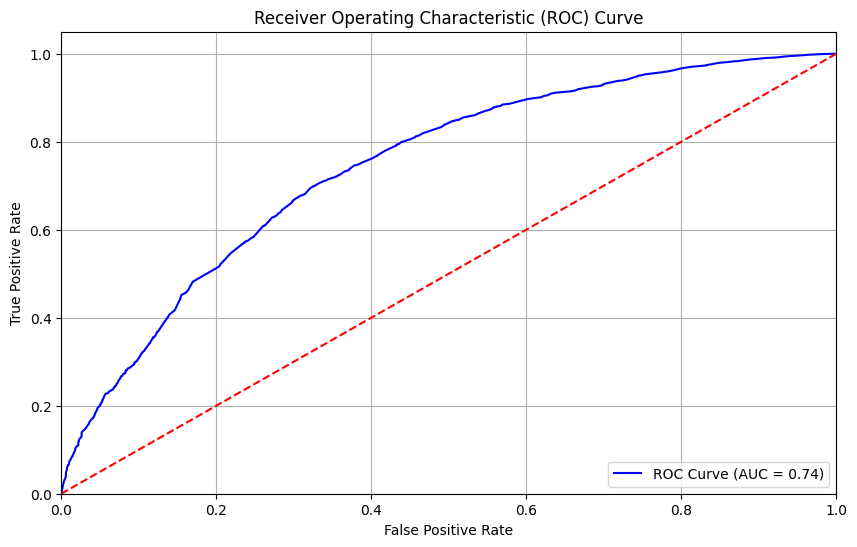

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Diagonal line for no discrimination
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 7. Apply a cutoff threshold 0.3 to obtain Recall/Sensitivity and Precision/Specificity for that threshold using the test dataset. Evaluate the model based on Recall and Precision by interpreting the results.

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
threshold = 0.3
y_pred_class = (y_prob >= threshold).astype(int)

In [ ]:
cm = confusion_matrix(y_test, y_pred_class)
tn, fp, fn, tp = cm.ravel()

In [ ]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)

In [ ]:
print(f"Confusion Matrix:\n{cm}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Precision: {precision:.4f}")

Confusion Matrix:
[[    2  3596]
 [    1 39120]]
Recall (Sensitivity): 1.0000
Precision: 0.9158


**Recall (Sensitivity): 1.0000**

This means the model correctly identified all of the actual employed individuals (true positives) in the test set. Since the Recall is 1.0000 (or 100%), there are no false negatives. This is excellent because it indicates that the model successfully captured every person who is actually employed.

**Precision: 0.9158**

This value indicates that when the model predicts that someone is employed, it is correct about 91.58% of the time. There are some false positives (predicted positives that are actually negatives), but overall, the precision is still quite high, indicating that the model is reliable in its positive predictions.